In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize a Logistic Regression classifier
classifier = LogisticRegression(max_iter=200)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5)

# Output the scores and the mean of the scores
cv_scores, cv_scores.mean()

(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 0.9733333333333334)

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define a Logistic Regression classifier with increased max_iter
classifier = LogisticRegression(max_iter=1000)

# Define a set of hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization problem
}

# Initialize GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform grid search with cross-validation
grid_search.fit(X, y)

# Get the best parameters and the cross-validation score for the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

C:\Users\dwtro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dwtro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dwtro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dwtro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dwtro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dwtro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

({'C': 10, 'solver': 'sag'}, 0.9800000000000001)

In [12]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data with two features that are linearly separable
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

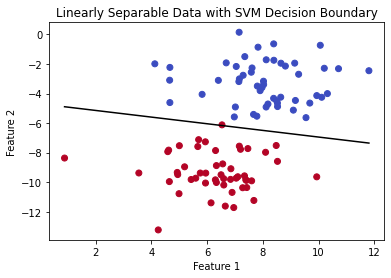

In [13]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Determine the weights and intercept
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Calculate the slope and y-intercept of the decision boundary
slope = -w[0] / w[1]
y_intercept = -b / w[1]

# Generate x values
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate the y values of the decision boundary
decision_boundary = slope * x_vals + y_intercept

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_vals, decision_boundary, 'k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data with SVM Decision Boundary')
plt.show()

In [7]:
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# For the example, let's load the wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

In [8]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SVM pipeline with standard scaling
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the SVM on the training data
svm_pipeline.fit(X_train, y_train)

# Score the SVM on the test data
test_score = svm_pipeline.score(X_test, y_test)

test_score

0.9814814814814815

In [11]:
X_train

array([[1.349e+01, 3.590e+00, 2.190e+00, ..., 8.100e-01, 1.820e+00,
        5.800e+02],
       [1.251e+01, 1.730e+00, 1.980e+00, ..., 1.040e+00, 3.570e+00,
        6.720e+02],
       [1.233e+01, 9.900e-01, 1.950e+00, ..., 1.060e+00, 2.310e+00,
        7.500e+02],
       ...,
       [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
        1.547e+03],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
        4.380e+02]])

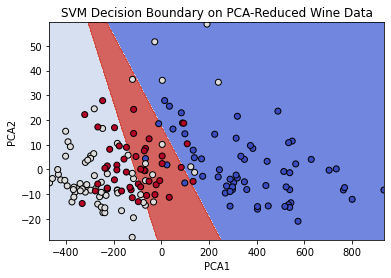

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce the data to two dimensions for visualization 
# We will learn this technique in future lectures!!!
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Fit the SVM model on the reduced data
svm_model_reduced = SVC(kernel='linear')
svm_model_reduced.fit(X_reduced, y)

# Step size in the mesh for plotting the decision boundary
h = .5  # Increase the step size to reduce the number of points

# Create a mesh to plot in
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the decision boundary
Z = svm_model_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('SVM Decision Boundary on PCA-Reduced Wine Data')
plt.show()